In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

cities = pd.read_csv(f'./livingwage.csv') # you might need to change this path
cities = cities.dropna()
cities.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23


In [6]:
df = cities.drop(["rank_2020", "city", "state"], axis=1)
df.head()

,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23


In [7]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
X

,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,8.340729,8.265880,0.584098,5.732322,1.540946,1.169561,1.268278,1.212508,1.079946,0.916878,0.914163,0.822177,1.035504,1.151819,1.249702,1.223809
1,3.323042,3.485087,1.393524,0.805962,1.252407,1.642133,1.581156,1.560118,1.596747,1.730788,1.746710,1.715464,1.384477,1.660261,1.596802,1.564368
2,2.144316,2.288367,0.235423,1.687563,0.090853,-0.074633,-0.057026,-0.132081,0.032377,-0.124747,-0.123789,-0.265523,0.000414,-0.085029,-0.057705,-0.142654
3,1.692398,1.638042,2.212049,-0.298092,-0.571307,-0.657965,-0.716727,-0.736666,-0.674383,-0.618504,-0.659154,-0.640938,-0.673873,-0.687226,-0.746119,-0.745505
4,0.980022,0.924805,1.625814,-0.414012,-0.156995,-0.593355,-0.765430,-0.737733,-0.124060,-0.232968,-0.211196,-0.094575,-0.147456,-0.557411,-0.740334,-0.715891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.429136,-0.418661,-0.480128,-0.451792,2.236399,2.572510,2.592107,2.558163,2.507434,2.456768,2.450332,2.369090,2.875006,2.568966,2.588927,2.554313
96,-0.430685,-0.424304,-0.525628,-0.361684,-1.163182,-1.019778,-0.944007,-0.851825,-1.207945,-1.064914,-1.056854,-0.895684,-1.259438,-1.000945,-0.942809,-0.832231
97,-0.431008,-0.459862,-0.516049,-0.384680,1.300497,1.800888,1.671183,1.557985,1.895653,1.978793,1.984893,1.831106,2.224378,1.815318,1.686469,1.562252
98,-0.432239,-0.401857,-0.441812,-0.524066,-0.682284,-0.630275,-0.722631,-0.843295,-0.576610,-0.458428,-0.447194,-0.619151,-0.567407,-0.625924,-0.714302,-0.849153


,0,1
0,5.718411,12.263365
1,5.840020,4.239134
2,0.253027,3.506501
3,-2.291930,2.786927
4,-1.497247,1.575500
...,...,...
95,8.500142,-1.877493
96,-3.542691,-0.357173
97,5.955127,-1.602913
98,-2.297809,-0.561539


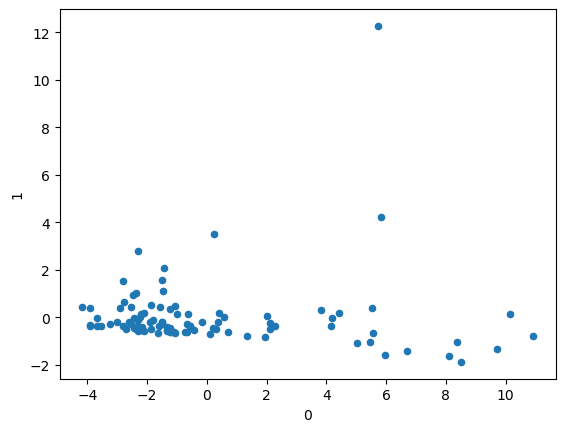

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
display(X_pca)
X_pca.plot.scatter(x=X_pca.columns[0],y=X_pca.columns[1]);

In [9]:
kmeans = KMeans(n_clusters=3).fit(X)

In [10]:
cluster_labels = {}
# Are we doing 1 indexing now?
cluster_labels[3] = kmeans.predict(X)
cluster_labels = pd.DataFrame(cluster_labels)

<AxesSubplot:xlabel='0', ylabel='1'>

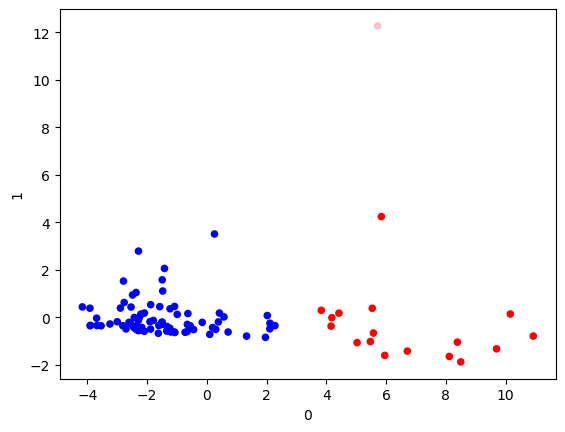

In [13]:
colorings = {}
# colorings[2] = cluster_labels[2].map({0: "Blue", 1: "Red"}) # This is a new pandas command for us that maps all 0 values to Blue, etc
colorings[3] = cluster_labels[3].map({0: "Blue", 1: "Red",2: "Pink"}) # This is a new pandas command for us that maps all 0 values to Blue, etc
# X_pca.plot.scatter(x=X_pca.columns[0],y=X_pca.columns[1],c=colorings[2])
X_pca.plot.scatter(x=X_pca.columns[0],y=X_pca.columns[1],c=colorings[3])

In [14]:
cluster_labels[3]

0     2
1     1
2     0
3     0
4     0
     ..
95    1
96    0
97    1
98    0
99    0
Name: 3, Length: 100, dtype: int32

In [18]:
combined_info = cities[['city', 'state']]
combined_info['cluster'] = cluster_labels[3]
combined_info['PC1'] = X_pca[0]
combined_info['PC2'] = X_pca[1]
combined_info.head()

/tmp/ipykernel_159159/4069559216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_info['cluster'] = cluster_labels[3]
/tmp/ipykernel_159159/4069559216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_info['PC1'] = X_pca[0]
/tmp/ipykernel_159159/4069559216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,city,state,cluster,PC1,PC2
0,New York,New York,2,5.718411,12.263365
1,Los Angeles,California,1,5.840020,4.239134
2,Chicago,Illinois,0,0.253027,3.506501
3,Houston,Texas,0,-2.291930,2.786927
4,Phoenix,Arizona,0,-1.497247,1.575500


In [19]:
combined_info

,city,state,cluster,PC1,PC2
0,New York,New York,2,5.718411,12.263365
1,Los Angeles,California,1,5.840020,4.239134
2,Chicago,Illinois,0,0.253027,3.506501
3,Houston,Texas,0,-2.291930,2.786927
4,Phoenix,Arizona,0,-1.497247,1.575500
...,...,...,...,...,...
95,Fremont,California,1,8.500142,-1.877493
96,Spokane,Washington,0,-3.542691,-0.357173
97,Santa Clarita,California,1,5.955127,-1.602913
98,Baton Rouge,Louisiana,0,-2.297809,-0.561539


In [23]:
# curious how some of our cities line up
# Yep, san diego expensive
combined_info[combined_info['city'] == 'San Diego']
combined_info[combined_info['city'] == 'Colorado Springs']
# Not in the dataset
combined_info[combined_info['city'] == 'San Luis Obispo']
combined_info[combined_info['city'] == 'Seattle']

,city,state,cluster,PC1,PC2
17,Seattle,Washington,0,2.021802,0.074441
